### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [509]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [512]:
data = pd.read_csv('data/coupons.csv')

In [514]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [517]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

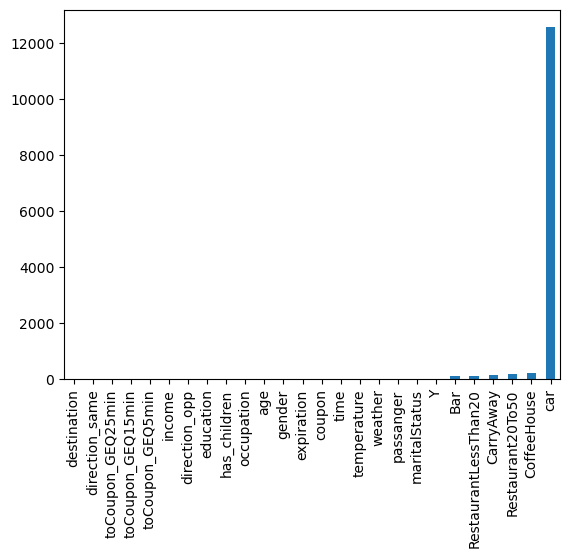

In [519]:
data.isna().sum().sort_values().plot(kind="bar")
plt.savefig('results/missing_plot_.png')
plt.show()

3. Decide what to do about your missing data -- drop, replace, other...

In [522]:
df = data.drop(columns='car') #dropping column 'car' since it has 12,576 NaN values

In [524]:
print(df[['Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50']])

         Bar CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50
0      never       never       NaN                  4~8              1~3
1      never       never       NaN                  4~8              1~3
2      never       never       NaN                  4~8              1~3
3      never       never       NaN                  4~8              1~3
4      never       never       NaN                  4~8              1~3
...      ...         ...       ...                  ...              ...
12679  never       never       1~3                  4~8              1~3
12680  never       never       1~3                  4~8              1~3
12681  never       never       1~3                  4~8              1~3
12682  never       never       1~3                  4~8              1~3
12683  never       never       1~3                  4~8              1~3

[12684 rows x 5 columns]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

<Axes: >

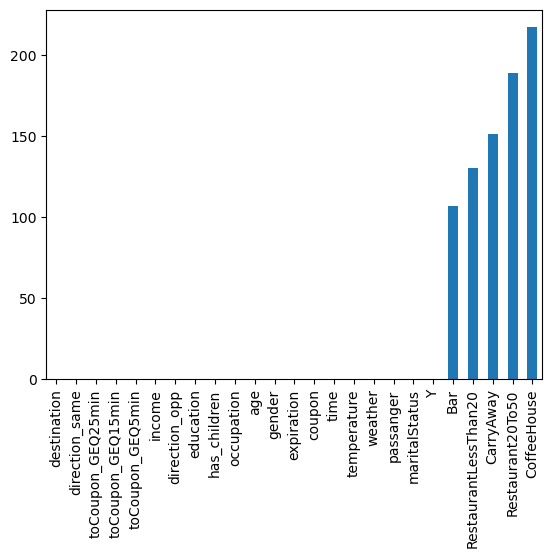

In [526]:
#df.fillna('unknown', inplace=True)
print(df.info())
df.isna().sum().sort_values().plot(kind="bar")

4. What proportion of the total observations chose to accept the coupon?



In [529]:
coupon_acceptance_ratio = ((df.query('Y == 1').Y.value_counts()/df.shape[0])[1]*100).round(2)
coupon_acceptance_ratio

56.84

5. Use a bar plot to visualize the `coupon` column.

In [618]:
df['coupon'].unique()

array(['Restaurant(<20)', 'Coffee House', 'Carry out & Take away', 'Bar',
       'Restaurant(20-50)'], dtype=object)

<Axes: xlabel='coupon'>

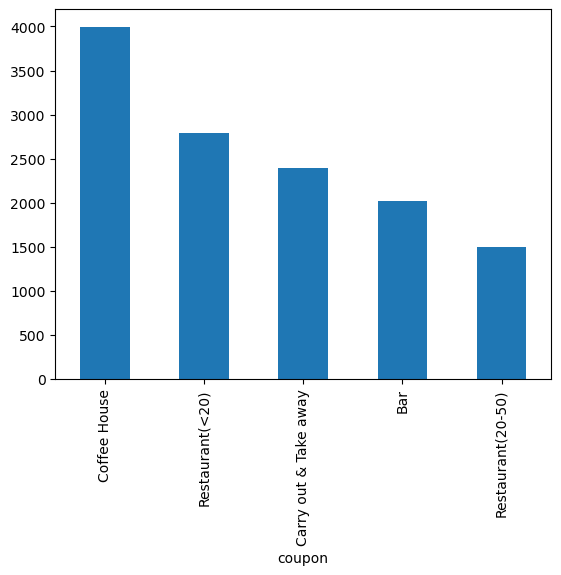

In [532]:
coupons = df['coupon'].value_counts()
coupons.plot(kind='bar')

6. Use a histogram to visualize the temperature column.

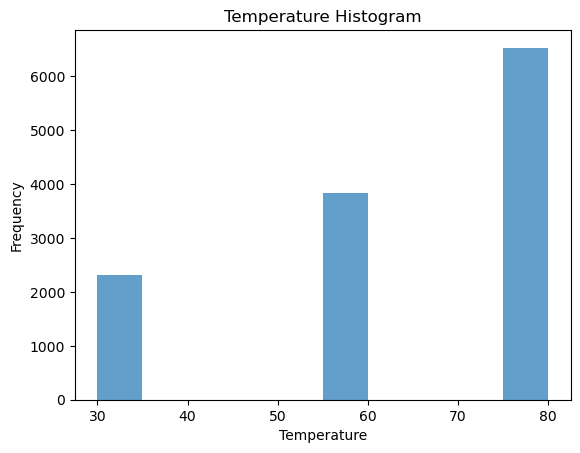

In [535]:
df['temperature'].plot.hist(bins=10, alpha=0.7)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Histogram')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [751]:
df_bar_coupons = df.query('coupon == "Bar"')
df_bar_coupons

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [754]:
bar_coupon_acceptance_ratio = ((df_bar_coupons.query('Y == 1').Y.value_counts()/df_bar_coupons.shape[0])[1]*100).round(2)
bar_coupon_acceptance_ratio

41.0

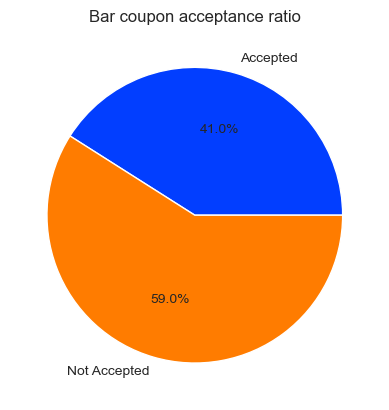

In [845]:
# Creating a bar coupon acceptance summary dataframe
data = pd.DataFrame({'category': ['Accepted', 'Not Accepted'], 'value': [bar_coupon_acceptance_ratio, 100-bar_coupon_acceptance_ratio]})

# define Seaborn color palette to use 
palette_color = sns.color_palette('bright') 
  
# plotting data on chart 
plt.pie(data['value'], labels=data['category'], colors=palette_color, autopct='%0.1f%%') 

# plot title
plt.title('Bar coupon acceptance ratio')

# Save the figure
plt.savefig('results/bar_coupon_acceptance_pie_chart.png')

# displaying chart 
plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [774]:
df_bar_coupons_cleaned = df_bar_coupons.dropna(subset = ['Bar']) #dropped rows having NaN values in Bar column
df_bar_coupons_cleaned

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


In [776]:
df_bar_coupons_cleaned['Bar'].unique() #unique values in Bar column

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

In [778]:
bar_values_3_or_fewer = ['never', 'less1', '1~3'] #values indicating customers who went 3 or fewer times a month to a bar
df_bar_3_or_fewer = df_bar_coupons_cleaned.query('Bar in @bar_values_3_or_fewer')
df_bar_3_or_fewer #dataframe of bar coupon data for customers who went 3 or fewer times to a bar

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


In [780]:
bar_coupon_acceptance_ratio_cust_3_or_fewer = ((df_bar_3_or_fewer.query('Y == 1').Y.value_counts()/df_bar_3_or_fewer.shape[0])[1]*100).round(2)
bar_coupon_acceptance_ratio_cust_3_or_fewer


37.06

In [782]:
bar_values_more_than_3 = ['gt8', '4~8'] #values indicating customers who went more than 3 times a month to a bar
df_bar_more_than_3 = df_bar_coupons_cleaned.query('Bar in @bar_values_more_than_3')
df_bar_more_than_3 #dataframe of bar coupon data for customers who went more than 3 times a month to a bar

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
156,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Single,...,gt8,gt8,gt8,gt8,1,0,0,0,1,1
167,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Single,...,gt8,gt8,gt8,gt8,1,0,0,1,0,1
171,Work,Alone,Sunny,55,7AM,Bar,1d,Male,26,Single,...,gt8,gt8,gt8,gt8,1,1,1,0,1,1
454,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,31,Single,...,gt8,gt8,gt8,gt8,1,0,0,0,1,0
465,Home,Alone,Sunny,55,6PM,Bar,1d,Male,31,Single,...,gt8,gt8,gt8,gt8,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12198,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Female,26,Unmarried partner,...,gt8,1~3,1~3,1~3,1,1,0,0,1,1
12199,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Female,26,Unmarried partner,...,gt8,1~3,1~3,1~3,1,1,0,0,1,1
12202,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Female,26,Unmarried partner,...,gt8,1~3,1~3,1~3,1,1,0,0,1,1
12207,Home,Partner,Sunny,30,10PM,Bar,2h,Female,26,Unmarried partner,...,gt8,1~3,1~3,1~3,1,1,1,0,1,1


In [784]:
bar_coupon_acceptance_ratio_cust_more_than_3 = ((df_bar_more_than_3.query('Y == 1').Y.value_counts()/df_bar_more_than_3.shape[0])[1]*100).round(2)
bar_coupon_acceptance_ratio_cust_more_than_3


76.88

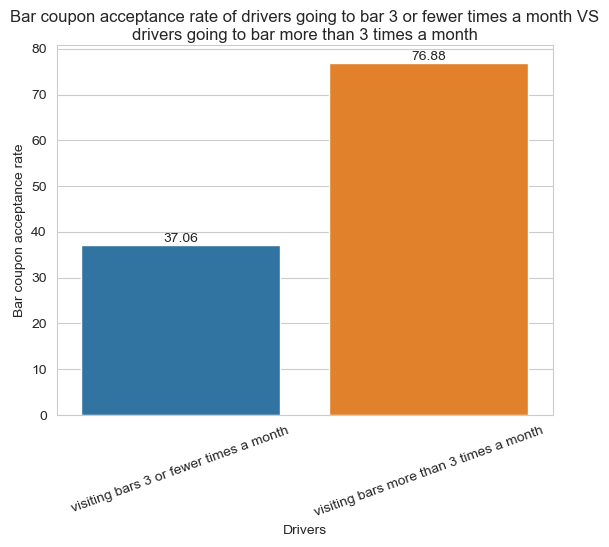

In [896]:
# Creating a bar coupon acceptance summary dataframe
data = pd.DataFrame({'Drivers': ['visiting bars 3 or fewer times a month', 'visiting bars more than 3 times a month'], 'Bar coupon acceptance rate': [bar_coupon_acceptance_ratio_cust_3_or_fewer, bar_coupon_acceptance_ratio_cust_more_than_3]})

# Create the bar chart
ax = sns.barplot(x="Drivers", y="Bar coupon acceptance rate", data=data, hue="Drivers")

# Rotate x-axis labels
plt.xticks(rotation=20)

# plot title
plt.title('Bar coupon acceptance rate of drivers going to bar 3 or fewer times a month VS drivers going to bar more than 3 times a month', wrap=True)

# Add the y-values as labels
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

# Save the figure
plt.savefig('results/bar_coupon_acceptance_rate1_bar_chart.png')

# Display the plot
plt.show()


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [899]:
df['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [901]:
bar_values_more_than_1 = ['1~3', 'gt8', '4~8'] #values indicating customers who went more than once a month to a bar
df_bar_more_than_1 = df_bar_coupons_cleaned.query('Bar in @bar_values_more_than_1')
age_values_gt_25 = ['26', '31', '36', '41', '46', '50plus']
df_bar_more_than_1_age_gt_25 = df_bar_more_than_1.query('age in @age_values_gt_25')
df_bar_more_than_1_age_gt_25 #dataframe of bar coupon data for customers who went more than once a month to a bar and are over the age of 25

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
112,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,0,0,0,1,1
123,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,0,0,1,0,1
127,Work,Alone,Sunny,55,7AM,Bar,1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,1,1,0,1,1
156,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Single,...,gt8,gt8,gt8,gt8,1,0,0,0,1,1
167,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Single,...,gt8,gt8,gt8,gt8,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12481,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Female,26,Unmarried partner,...,never,4~8,4~8,less1,1,1,0,0,1,1
12482,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Female,26,Unmarried partner,...,never,4~8,4~8,less1,1,1,0,0,1,1
12485,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Female,26,Unmarried partner,...,never,4~8,4~8,less1,1,1,0,0,1,1
12488,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Female,26,Unmarried partner,...,never,4~8,4~8,less1,1,1,0,0,1,1


In [903]:
bar_coupon_acceptance_ratio_cust_more_than_1_age_gt_25 = ((df_bar_more_than_1_age_gt_25.query('Y == 1').Y.value_counts()/df_bar_more_than_1_age_gt_25.shape[0])[1]*100).round(2)
bar_coupon_acceptance_ratio_cust_more_than_1_age_gt_25


69.52

In [904]:
#df_bar_coupons_cleaned.index
df_bar_others = df_bar_coupons_cleaned[~df_bar_coupons_cleaned.index.isin(df_bar_more_than_1_age_gt_25.index)]
df_bar_others

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


In [907]:
bar_coupon_acceptance_ratio_cust_others = ((df_bar_others.query('Y == 1').Y.value_counts()/df_bar_others.shape[0])[1]*100).round(2)
bar_coupon_acceptance_ratio_cust_others

33.44

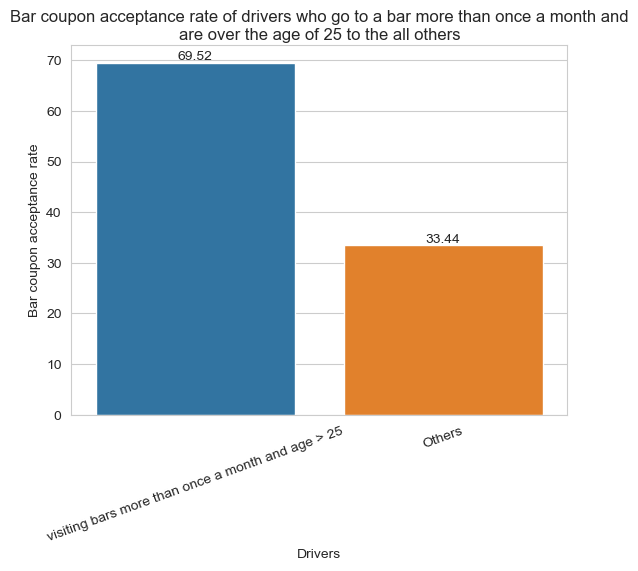

In [909]:
# Creating a bar coupon acceptance summary dataframe
data = pd.DataFrame({'Drivers': ['visiting bars more than once a month and age > 25', 'Others'], 'Bar coupon acceptance rate': [bar_coupon_acceptance_ratio_cust_more_than_1_age_gt_25, bar_coupon_acceptance_ratio_cust_others]})

# Create the bar chart
ax = sns.barplot(x="Drivers", y="Bar coupon acceptance rate", data=data, hue="Drivers")

# Rotate x-axis labels
plt.xticks(rotation=20)

# plot title
plt.title('Bar coupon acceptance rate of drivers who go to a bar more than once a month and are over the age of 25 to the all others',wrap=True)

# Add the y-values as labels
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

# Save the figure
plt.savefig('results/bar_coupon_acceptance_rate2_bar_chart.png')

# Display the plot
plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [911]:
df['passanger'].unique()

array(['Alone', 'Friend(s)', 'Kid(s)', 'Partner'], dtype=object)

In [912]:
df['occupation'].unique()

array(['Unemployed', 'Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Community & Social Services',
       'Office & Administrative Support', 'Construction & Extraction',
       'Legal', 'Retired', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

In [913]:
bar_values_more_than_1 = ['1~3', 'gt8', '4~8'] #values indicating customers who went more than once a month to a bar
df_bar_more_than_1 = df_bar_coupons_cleaned.query('Bar in @bar_values_more_than_1')
passenger_values_excl_kids = ['Alone', 'Friend(s)', 'Partner']
occupation_excl = ['Farming Fishing & Forestry']
df_bar_more_than_1_pass_not_kid = df_bar_more_than_1.query('passanger in @passenger_values_excl_kids')
df_bar_more_than_1_pass_not_kid #dataframe of bar coupon data for customers who went more than once a month to a bar and had passengers 
#that were not a kid 

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
90,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,1~3,less1,1~3,1,0,0,0,1,1
101,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,1~3,less1,1~3,1,0,0,1,0,1
105,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,1~3,less1,1~3,1,1,1,0,1,0
112,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,0,0,0,1,1
123,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12500,Work,Alone,Snowy,30,7AM,Bar,1d,Female,26,Unmarried partner,...,never,4~8,4~8,less1,1,1,1,0,1,0
12525,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,21,Unmarried partner,...,never,gt8,4~8,1~3,1,1,0,0,1,1
12526,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,21,Unmarried partner,...,never,gt8,4~8,1~3,1,1,0,0,1,1
12529,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,21,Unmarried partner,...,never,gt8,4~8,1~3,1,1,0,0,1,0


In [914]:
bar_coupon_acceptance_ratio_cust_more_than_1_PASS_not_kid = ((df_bar_more_than_1_pass_not_kid.query('Y == 1').Y.value_counts()/df_bar_more_than_1_pass_not_kid.shape[0])[1]*100).round(2)
bar_coupon_acceptance_ratio_cust_more_than_1_PASS_not_kid


71.32

In [918]:
df_bar_more_than_1_OCC_not_farm_fish_forest = df_bar_more_than_1.query('occupation not in @occupation_excl')
df_bar_more_than_1_OCC_not_farm_fish_forest #dataframe of bar coupon data for customers who went more than once a month to a bar and had occupations other than farming, fishing, or forestry

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
90,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,1~3,less1,1~3,1,0,0,0,1,1
101,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,1~3,less1,1~3,1,0,0,1,0,1
105,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,1~3,less1,1~3,1,1,1,0,1,0
112,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,0,0,0,1,1
123,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12500,Work,Alone,Snowy,30,7AM,Bar,1d,Female,26,Unmarried partner,...,never,4~8,4~8,less1,1,1,1,0,1,0
12525,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,21,Unmarried partner,...,never,gt8,4~8,1~3,1,1,0,0,1,1
12526,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,21,Unmarried partner,...,never,gt8,4~8,1~3,1,1,0,0,1,1
12529,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,21,Unmarried partner,...,never,gt8,4~8,1~3,1,1,0,0,1,0


In [922]:
bar_coupon_acceptance_ratio_cust_more_than_1_OCC_not_farm_fish_forest = ((df_bar_more_than_1_OCC_not_farm_fish_forest.query('Y == 1').Y.value_counts()/df_bar_more_than_1_OCC_not_farm_fish_forest.shape[0])[1]*100).round(2)
bar_coupon_acceptance_ratio_cust_more_than_1_OCC_not_farm_fish_forest

68.79

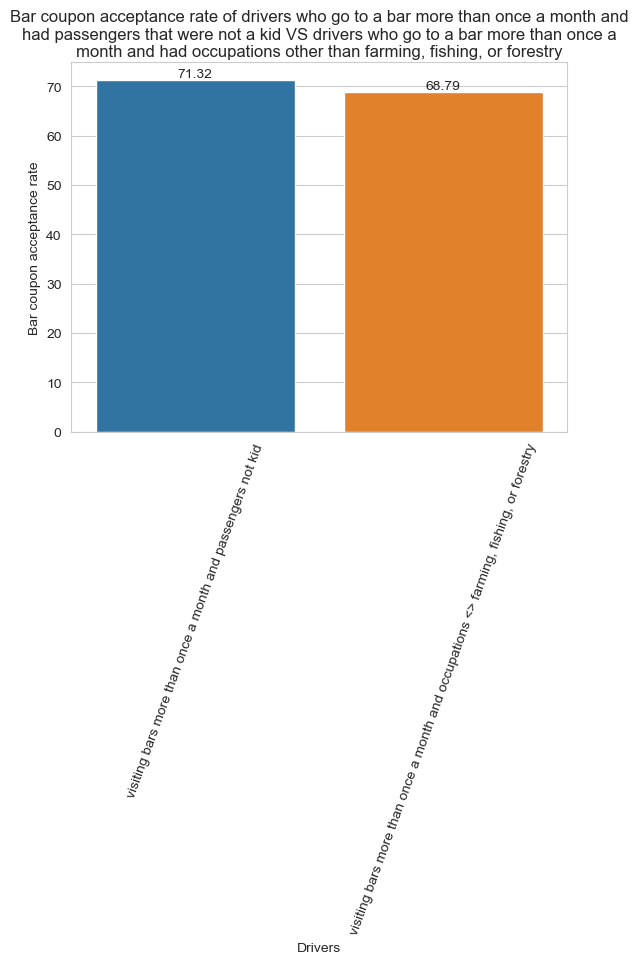

In [969]:
# Creating a bar coupon acceptance summary dataframe
data = pd.DataFrame({'Drivers': ['visiting bars more than once a month and passengers not kid', 'visiting bars more than once a month and occupations <> farming, fishing, or forestry'], 'Bar coupon acceptance rate': [bar_coupon_acceptance_ratio_cust_more_than_1_PASS_not_kid, bar_coupon_acceptance_ratio_cust_more_than_1_OCC_not_farm_fish_forest]})

# Create the bar chart
ax = sns.barplot(x="Drivers", y="Bar coupon acceptance rate", data=data, hue="Drivers")

# Rotate x-axis labels
plt.xticks(rotation=70)

# plot title
plt.title('Bar coupon acceptance rate of drivers who go to a bar more than once a month and had passengers that were not a kid VS drivers who go to a bar more than once a month and had occupations other than farming, fishing, or forestry', wrap=True)

# Add the y-values as labels
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

# Save the figure
plt.savefig('results/bar_coupon_acceptance_rate3_bar_chart.png')

# Display the plot
plt.show()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [939]:
df['maritalStatus'].unique()

array(['Unmarried partner', 'Single', 'Married partner', 'Divorced',
       'Widowed'], dtype=object)

In [941]:
df['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [943]:
marital_status_values = ['Unmarried partner', 'Single', 'Married partner', 'Divorced']
age_under30_values = ['below21', '21', '26']
#coupon acceptance dataframe for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed
df_bar_new1 = df_bar_more_than_1.query('passanger in @passenger_values_excl_kids and maritalStatus in @marital_status_values')
df_bar_new1

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
90,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,1~3,less1,1~3,1,0,0,0,1,1
101,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,1~3,less1,1~3,1,0,0,1,0,1
105,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,1~3,less1,1~3,1,1,1,0,1,0
112,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,0,0,0,1,1
123,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12500,Work,Alone,Snowy,30,7AM,Bar,1d,Female,26,Unmarried partner,...,never,4~8,4~8,less1,1,1,1,0,1,0
12525,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,21,Unmarried partner,...,never,gt8,4~8,1~3,1,1,0,0,1,1
12526,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,21,Unmarried partner,...,never,gt8,4~8,1~3,1,1,0,0,1,1
12529,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,21,Unmarried partner,...,never,gt8,4~8,1~3,1,1,0,0,1,0


In [945]:
bar_coupon_acceptance_ratio1 = ((df_bar_new1.query('Y == 1').Y.value_counts()/df_bar_new1.shape[0])[1]*100).round(2)
bar_coupon_acceptance_ratio1

71.32

In [947]:
#coupon acceptance dataframe for drivers who go to bars more than once a month and are under the age of 30
df_bar_new2 = df_bar_more_than_1.query('age in @age_under30_values')
df_bar_new2

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
90,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,1~3,less1,1~3,1,0,0,0,1,1
101,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,1~3,less1,1~3,1,0,0,1,0,1
105,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,1~3,less1,1~3,1,1,1,0,1,0
112,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,0,0,0,1,1
123,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12500,Work,Alone,Snowy,30,7AM,Bar,1d,Female,26,Unmarried partner,...,never,4~8,4~8,less1,1,1,1,0,1,0
12525,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,21,Unmarried partner,...,never,gt8,4~8,1~3,1,1,0,0,1,1
12526,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,21,Unmarried partner,...,never,gt8,4~8,1~3,1,1,0,0,1,1
12529,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,21,Unmarried partner,...,never,gt8,4~8,1~3,1,1,0,0,1,0


In [949]:
bar_coupon_acceptance_ratio2 = ((df_bar_new2.query('Y == 1').Y.value_counts()/df_bar_new2.shape[0])[1]*100).round(2)
bar_coupon_acceptance_ratio2

72.17

In [950]:
df_bar_coupons_cleaned['RestaurantLessThan20'].unique()

array(['4~8', '1~3', 'less1', 'gt8', nan, 'never'], dtype=object)

In [952]:
df_bar_coupons_cleaned['income'].unique()

array(['$37500 - $49999', '$62500 - $74999', '$12500 - $24999',
       '$75000 - $87499', '$50000 - $62499', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [955]:
cheap_rest_visits_gt_4_values = ['4~8', 'gt8']
income_lt_50k_values = ['$12500 - $24999', '$37500 - $49999', '$25000 - $37499', 'Less than $12500']
#coupon acceptance dataframe for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K
df_bar_new3 = df_bar_coupons_cleaned.query('RestaurantLessThan20 in @cheap_rest_visits_gt_4_values and income in @income_lt_50k_values')
df_bar_new3

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
156,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Single,...,gt8,gt8,gt8,gt8,1,0,0,0,1,1
167,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Single,...,gt8,gt8,gt8,gt8,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12368,Work,Alone,Snowy,30,7AM,Bar,1d,Female,31,Single,...,4~8,less1,4~8,1~3,1,1,1,0,1,0
12525,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,21,Unmarried partner,...,never,gt8,4~8,1~3,1,1,0,0,1,1
12526,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,21,Unmarried partner,...,never,gt8,4~8,1~3,1,1,0,0,1,1
12529,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,21,Unmarried partner,...,never,gt8,4~8,1~3,1,1,0,0,1,0


In [957]:
bar_coupon_acceptance_ratio3 = ((df_bar_new3.query('Y == 1').Y.value_counts()/df_bar_new3.shape[0])[1]*100).round(2)
bar_coupon_acceptance_ratio3

45.72

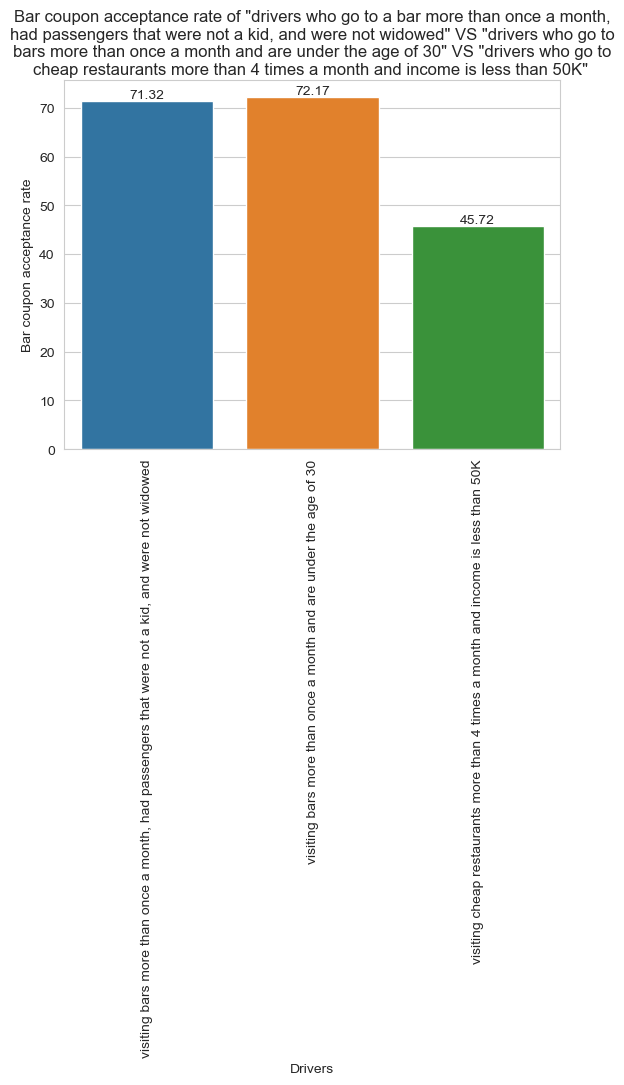

In [971]:
#go to bars more than once a month, had passengers that were not a kid, and were not widowed OR
#go to bars more than once a month and are under the age of 30 OR
#go to cheap restaurants more than 4 times a month and income is less than 50K.

# Creating a bar coupon acceptance summary dataframe
data = pd.DataFrame({'Drivers': ['visiting bars more than once a month, had passengers that were not a kid, and were not widowed', 'visiting bars more than once a month and are under the age of 30', 'visiting cheap restaurants more than 4 times a month and income is less than 50K'], 'Bar coupon acceptance rate': [bar_coupon_acceptance_ratio1, bar_coupon_acceptance_ratio2, bar_coupon_acceptance_ratio3]})

# Create the bar chart
ax = sns.barplot(x="Drivers", y="Bar coupon acceptance rate", data=data, hue="Drivers")

# Rotate x-axis labels
plt.xticks(rotation=90)

# plot title
plt.title('Bar coupon acceptance rate of "drivers who go to a bar more than once a month, had passengers that were not a kid, and were not widowed" VS "drivers who go to bars more than once a month and are under the age of 30" VS "drivers who go to cheap restaurants more than 4 times a month and income is less than 50K" ', wrap=True)

# Add the y-values as labels
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])

# Save the figure
plt.savefig('results/bar_coupon_acceptance_rate4_bar_chart.png')

# Display the plot
plt.show()

In [491]:
combined_df = pd.concat([df_bar_new1, df_bar_new2, df_bar_new3]).drop_duplicates()
combined_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
90,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,1~3,less1,1~3,1,0,0,0,1,1
101,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,1~3,less1,1~3,1,0,0,1,0,1
105,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,1~3,less1,1~3,1,1,1,0,1,0
112,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,0,0,0,1,1
123,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12128,Work,Alone,Snowy,30,7AM,Bar,1d,Female,36,Married partner,...,1~3,4~8,4~8,4~8,1,1,1,0,1,0
12349,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Female,31,Single,...,4~8,less1,4~8,1~3,1,1,0,0,1,0
12350,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Female,31,Single,...,4~8,less1,4~8,1~3,1,1,0,0,1,0
12353,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Female,31,Single,...,4~8,less1,4~8,1~3,1,1,0,0,1,0


In [493]:
bar_coupon_acceptance_ratio_combined = ((combined_df.query('Y == 1').Y.value_counts()/combined_df.shape[0])[1]*100).round(2)
bar_coupon_acceptance_ratio_combined

59.14

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

   * **Overall** Bar coupon acceptance rate = 41%
   * Bar coupon acceptance rate of drivers who **went to a bar 3 or fewer times a month** = 37.06%
   * Bar coupon acceptance rate of drivers who **went to a bar more than 3 times a month** = 76.88%
   * Bar coupon acceptance rate of drivers who **go to a bar more than once a month and are over the age of 25** = 69.52%
   * Bar coupon acceptance rate of drivers **other** than the ones who go to a bar more than once a month and are over the age of 25 = 33.44% 
   * Bar coupon acceptance rate of drivers who **go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry** = 71.32%
   * Bar coupon acceptance rate of drivers who **go to bars more than once a month, had passengers that were not a kid, and were not widowed** = 71.32%
   * Bar coupon acceptance rate of drivers who **go to bars more than once a month and are under the age of 30** = 72.17%
   * Bar coupon acceptance rate of drivers who **go to cheap restaurants more than 4 times a month and income is less than 50K** = 45.72%  

Coupon acceptance rate of drivers who went to a bar more than 3 times a month is **39.82% higher** than than the drivers who went to bar less than than 3 times a month   
Coupon acceptance rate of drivers who went to a bar more than once a month and are over the age of 25 is **36.08% higher** than other drivers  

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

**Investigating the Coffee House Coupons**  

1. Create a new `DataFrame` that contains just the Coffee House coupons.

In [975]:
df_coffee_house_coupons = df.query('coupon == "Coffee House"')
df_coffee_house_coupons

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12656,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,31,Married partner,...,never,4~8,gt8,less1,1,1,0,0,1,0
12659,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,31,Married partner,...,never,4~8,gt8,less1,1,0,0,1,0,0
12674,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12675,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of Coffee House coupons were accepted?

In [978]:
coffee_house_coupon_acceptance_ratio = ((df_coffee_house_coupons.query('Y == 1').Y.value_counts()/df_coffee_house_coupons.shape[0])[1]*100).round(2)
coffee_house_coupon_acceptance_ratio

49.92

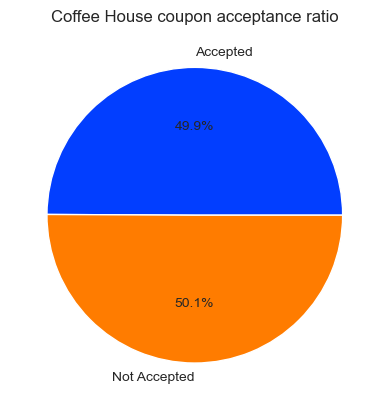

In [980]:
# Creating a coffee house coupon acceptance summary dataframe
data = pd.DataFrame({'category': ['Accepted', 'Not Accepted'], 'value': [coffee_house_coupon_acceptance_ratio, 100-coffee_house_coupon_acceptance_ratio]})

# define Seaborn color palette to use 
palette_color = sns.color_palette('bright') 
  
# plotting data on chart 
plt.pie(data['value'], labels=data['category'], colors=palette_color, autopct='%0.1f%%') 

# plot title
plt.title('Coffee House coupon acceptance ratio')

# Save the figure
plt.savefig('results/coffee_house_coupon_acceptance_pie_chart.png')

# displaying chart 
plt.show()

3. Compare the acceptance rate between those who went to a Coffee House more than 3 times a month to others.

In [666]:
df['CoffeeHouse'].unique()

array(['never', 'less1', '4~8', '1~3', 'gt8', nan], dtype=object)

In [668]:
df_coffee_house_coupons_cleaned = df_coffee_house_coupons.dropna(subset = ['CoffeeHouse']) #dropped rows having NaN values in CoffeeHouse column
df_coffee_house_coupons_cleaned

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12656,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,31,Married partner,...,never,4~8,gt8,less1,1,1,0,0,1,0
12659,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,31,Married partner,...,never,4~8,gt8,less1,1,0,0,1,0,0
12674,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12675,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


In [694]:
coffee_house_visit_gt_3_values = ['4~8', 'gt8']
#coffee_house_visit_gt_3_values = ['never', 'less1', '1~3']
df_coffee_house_coupon_cust_visit_gt_3 = df_coffee_house_coupons_cleaned.query('CoffeeHouse in @coffee_house_visit_gt_3_values')
df_coffee_house_coupon_cust_visit_gt_3 #coupon acceptance data of drivers who went to a Coffee House more than 3 times a month

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
45,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,1
48,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,1
49,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,46,Single,...,4~8,1~3,1~3,never,1,1,0,0,1,1
50,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,1,0,0,1,0
52,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12360,Home,Alone,Snowy,30,10PM,Coffee House,2h,Female,31,Single,...,4~8,less1,4~8,1~3,1,1,0,0,1,0
12366,Work,Alone,Snowy,30,7AM,Coffee House,1d,Female,31,Single,...,4~8,less1,4~8,1~3,1,0,0,1,0,1
12624,Home,Alone,Rainy,55,10PM,Coffee House,2h,Female,21,Unmarried partner,...,4~8,1~3,1~3,less1,1,0,0,1,0,1
12625,Home,Alone,Snowy,30,10PM,Coffee House,2h,Female,21,Unmarried partner,...,4~8,1~3,1~3,less1,1,1,0,0,1,0


In [696]:
coffee_house_coupon_acceptance_ratio_visit_gt_3 = ((df_coffee_house_coupon_cust_visit_gt_3.query('Y == 1').Y.value_counts()/df_coffee_house_coupon_cust_visit_gt_3.shape[0])[1]*100).round(2)
coffee_house_coupon_acceptance_ratio_visit_gt_3

67.5

In [698]:
df_coffee_house_others = df_coffee_house_coupons_cleaned[~df_coffee_house_coupons_cleaned.index.isin(df_coffee_house_coupon_cust_visit_gt_3.index)]
df_coffee_house_others

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12656,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,31,Married partner,...,never,4~8,gt8,less1,1,1,0,0,1,0
12659,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,31,Married partner,...,never,4~8,gt8,less1,1,0,0,1,0,0
12674,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12675,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


In [700]:
coffee_house_coupon_acceptance_ratio_visit_lte_3 = ((df_coffee_house_others.query('Y == 1').Y.value_counts()/df_coffee_house_others.shape[0])[1]*100).round(2)
coffee_house_coupon_acceptance_ratio_visit_lte_3

44.94

4. What is the acceptance rate drivers who went to a Coffee House more than 3 times a month and whose destination is work?

In [718]:
df_coffee_house_coupons_cleaned['destination'].unique()

array(['No Urgent Place', 'Home', 'Work'], dtype=object)

In [732]:
destination_values = ['Work']
df_coffee_house_coupon_cust_visit_gt_3_dest_work = df_coffee_house_coupon_cust_visit_gt_3.query('destination in @destination_values')
df_coffee_house_coupon_cust_visit_gt_3_dest_work

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
60,Work,Alone,Sunny,55,7AM,Coffee House,2h,Male,46,Single,...,4~8,1~3,1~3,never,1,1,1,0,1,0
65,Work,Alone,Sunny,55,7AM,Coffee House,2h,Male,46,Single,...,4~8,1~3,1~3,never,1,1,0,0,1,0
126,Work,Alone,Sunny,55,7AM,Coffee House,2h,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,1,1,0,1,1
131,Work,Alone,Sunny,55,7AM,Coffee House,2h,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,1,0,0,1,1
170,Work,Alone,Sunny,55,7AM,Coffee House,2h,Male,26,Single,...,gt8,gt8,gt8,gt8,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12191,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,gt8,gt8,gt8,gt8,1,0,0,1,0,1
12214,Work,Alone,Snowy,30,7AM,Coffee House,1d,Female,26,Unmarried partner,...,gt8,1~3,1~3,1~3,1,0,0,1,0,1
12279,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,gt8,4~8,4~8,4~8,1,0,0,1,0,1
12366,Work,Alone,Snowy,30,7AM,Coffee House,1d,Female,31,Single,...,4~8,less1,4~8,1~3,1,0,0,1,0,1


In [734]:
coffee_house_coupon_acceptance_ratio_visit_gt_3_dest_work = ((df_coffee_house_coupon_cust_visit_gt_3_dest_work.query('Y == 1').Y.value_counts()/df_coffee_house_coupon_cust_visit_gt_3_dest_work.shape[0])[1]*100).round(2)
coffee_house_coupon_acceptance_ratio_visit_gt_3_dest_work

65.37

5. What is the acceptance rate drivers who went to a Coffee House more than 3 times a month and whose destination is 'No Urgent Place'?

In [736]:
destination_values = ['No Urgent Place']
df_coffee_house_coupon_cust_visit_gt_3_dest_nup = df_coffee_house_coupon_cust_visit_gt_3.query('destination in @destination_values')
df_coffee_house_coupon_cust_visit_gt_3_dest_nup

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
45,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,1
48,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,1
49,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,46,Single,...,4~8,1~3,1~3,never,1,1,0,0,1,1
50,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,1,0,0,1,0
52,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10685,No Urgent Place,Alone,Sunny,80,10AM,Coffee House,2h,Male,26,Married partner,...,4~8,1~3,1~3,NaN,1,1,0,0,1,0
10687,No Urgent Place,Alone,Rainy,55,10AM,Coffee House,1d,Male,26,Married partner,...,4~8,1~3,1~3,NaN,1,1,0,0,1,1
10740,No Urgent Place,Alone,Sunny,80,10AM,Coffee House,2h,Female,41,Married partner,...,gt8,4~8,4~8,4~8,1,1,0,0,1,1
10741,No Urgent Place,Friend(s),Sunny,80,10PM,Coffee House,1d,Female,41,Married partner,...,gt8,4~8,4~8,4~8,1,1,0,0,1,1


In [738]:
coffee_house_coupon_acceptance_ratio_visit_gt_3_dest_nup = ((df_coffee_house_coupon_cust_visit_gt_3_dest_nup.query('Y == 1').Y.value_counts()/df_coffee_house_coupon_cust_visit_gt_3_dest_nup.shape[0])[1]*100).round(2)
coffee_house_coupon_acceptance_ratio_visit_gt_3_dest_nup

72.73

6. What is the acceptance rate of drivers who went to a Coffee House more than 8 times a month?

In [745]:
coffee_house_visit_gt_8_values = ['gt8']
df_coffee_house_coupon_cust_visit_gt_8 = df_coffee_house_coupons_cleaned.query('CoffeeHouse in @coffee_house_visit_gt_8_values')
df_coffee_house_coupon_cust_visit_gt_8 #coupon acceptance data of drivers who went to a Coffee House more than 8 times a month

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
111,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,0,0,0,1,1
114,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,0,0,0,1,1
115,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,1,0,0,1,0
116,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,1,0,0,1,1
118,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12211,Home,Alone,Snowy,30,10PM,Coffee House,2h,Female,26,Unmarried partner,...,gt8,1~3,1~3,1~3,1,1,0,0,1,0
12214,Work,Alone,Snowy,30,7AM,Coffee House,1d,Female,26,Unmarried partner,...,gt8,1~3,1~3,1~3,1,0,0,1,0,1
12272,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,26,Single,...,gt8,4~8,4~8,4~8,1,0,0,1,0,0
12273,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,Single,...,gt8,4~8,4~8,4~8,1,1,0,0,1,0


In [747]:
coffee_house_coupon_acceptance_ratio_visit_gt_8 = ((df_coffee_house_coupon_cust_visit_gt_8.query('Y == 1').Y.value_counts()/df_coffee_house_coupon_cust_visit_gt_8.shape[0])[1]*100).round(2)
coffee_house_coupon_acceptance_ratio_visit_gt_8

65.79

**Insights**

 * **Overall** Coffee House coupon acceptance rate = 49.92%
 * Removed records having null/NaN in CoffeeHouse visits data since it had a very low volume of about 1.8% of all the coffee house coupon data
 * Coffee House coupon acceptance rate of drivers who **went to a coffee house more than 3 times a month** = 67.5%
 * Coffee House coupon acceptance rate of drivers who **went to a coffee house less than or equal to 3 times a month** = 44.94%
 * Coffee House coupon acceptance rate of drivers who **went to a coffee house more than 3 times a month and destination is 'Work'** = 65.37%
 * Coffee House coupon acceptance rate of drivers who **went to a coffee house more than 3 times a month and destination is 'No Urgent Place'** = 72.73%
 * Coffee House coupon acceptance rate of drivers who **went to a coffee house more than 8 times a month** = 65.79%

1. Coupon acceptance rate of drivers who went to a coffee house more than 3 times a month is **22.56% more** than drivers who went to a coffee house less than or equal to 3 times a month  
2. Coupon acceptance rate of drivers who went to a coffee house more than 3 times a month and had destination as 'No Urgent Place' have **7.36%** more than drivers who went to a coffee house more than 3 times a month and had destination as 'Work'
3. Coupon acceptance rate of drivers who went to a coffee house more than 8 times a month is **only 1.71% less** than drivers who went to a coffee house more than 3 times a month